# Spotify Song Popularity Prediction

## ML for Data Analytics - CS985/6 Regression Problem

**Objective:** Build a machine learning model to predict song popularity (regression problem)

**Evaluation Metric:** Root Mean Square Error (RMSE)

**Data Source:** Kaggle Competition - CS985/6 Spotify Regression Problem 2026

---

### Dataset Information
- **Training data:** `CS98XRegressionTrain.csv` - 452 songs with popularity values
- **Test data:** `CS98XRegressionTest.csv` - 113 songs (need to predict popularity)

### Available Features (13 attributes excluding Id and pop)
- **Metadata:** title, artist, top genre, year
- **Audio Features:** bpm, nrgy, dnce, dB, live, val, dur, acous, spch

### Notes from Assignment
- There are some missing values in the data
- Year data may be inconsistent due to re-releases

---

### Approach Overview
1. **Data Loading** - Load training and test datasets
2. **Exploratory Data Analysis (EDA)** - Understand distributions, correlations, missing values
3. **Data Cleaning** - Handle missing values and outliers
4. **Feature Engineering** - Create or transform features
5. **Model Building** - Train and compare multiple regression models
6. **Model Evaluation** - Assess performance using RMSE with cross-validation
7. **Predictions** - Generate predictions for test set submission

---
## 1. Import Libraries

We import libraries for:
- **Data manipulation**: pandas, numpy
- **Visualization**: matplotlib, seaborn
- **Machine Learning**: scikit-learn models, preprocessing, and metrics

In [3]:
# Core data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


---
## 2. Load Data

We load the competition datasets:
- **Training set**: Contains features AND the target variable (`pop`)
- **Test set**: Contains features ONLY - we need to predict `pop`

In [5]:
# Load training and test data
train_df = pd.read_csv('./data/CS98XRegressionTrain.csv')
test_df = pd.read_csv('./data/CS98XRegressionTest.csv')

print("="*60)
print("DATA LOADED SUCCESSFULLY")
print("="*60)
print(f"Training set: {train_df.shape[0]} rows, {train_df.shape[1]} columns")
print(f"Test set:     {test_df.shape[0]} rows, {test_df.shape[1]} columns")
print(f"\nTraining columns: {train_df.columns.tolist()}")
print(f"\nTest columns: {test_df.columns.tolist()}")

DATA LOADED SUCCESSFULLY
Training set: 453 rows, 15 columns
Test set:     114 rows, 14 columns

Training columns: ['Id', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

Test columns: ['Id', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']


In [6]:
# First look at training data
print("\nFirst 5 rows of training data:")
train_df.head()


First 5 rows of training data:


,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [7]:
# First look at test data
print("First 5 rows of test data:")
test_df.head()

First 5 rows of test data:


,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3


---
## 3. Exploratory Data Analysis (EDA)

EDA helps us understand:
- Data types and structure
- Missing values
- Distribution of features and target
- Relationships between features and target

### 3.1 Data Types and Missing Values

In [10]:
# Data types
print("="*60)
print("DATA TYPES - TRAINING SET")
print("="*60)
train_df.info()

DATA TYPES - TRAINING SET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [11]:
# Check for missing values in training data
print("="*60)
print("MISSING VALUES - TRAINING SET")
print("="*60)

# Check both null and empty string for 'top genre'
train_missing = train_df.isnull().sum()
train_empty_genre = (train_df['top genre'] == '').sum() if 'top genre' in train_df.columns else 0

print("Null values:")
print(train_missing[train_missing > 0] if train_missing.sum() > 0 else "No null values found")

print(f"\nEmpty 'top genre' values: {train_empty_genre}")

# Show rows with missing genre
if train_empty_genre > 0:
    print(f"\nSample rows with empty genre:")
    print(train_df[train_df['top genre'] == ''][['Id', 'title', 'artist', 'top genre']].head())

MISSING VALUES - TRAINING SET
Null values:
top genre    15
dtype: int64

Empty 'top genre' values: 0


In [12]:
# Check for missing values in test data
print("="*60)
print("MISSING VALUES - TEST SET")
print("="*60)

test_missing = test_df.isnull().sum()
test_empty_genre = (test_df['top genre'] == '').sum() if 'top genre' in test_df.columns else 0

print("Null values:")
print(test_missing[test_missing > 0] if test_missing.sum() > 0 else "No null values found")

print(f"\nEmpty 'top genre' values: {test_empty_genre}")

MISSING VALUES - TEST SET
Null values:
top genre    1
dtype: int64

Empty 'top genre' values: 0


### 3.2 Statistical Summary

In [14]:
# Statistical summary of numerical columns
print("="*60)
print("STATISTICAL SUMMARY - TRAINING SET")
print("="*60)
train_df.describe()

STATISTICAL SUMMARY - TRAINING SET


,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


### 3.3 Target Variable Analysis

Understanding the distribution of `pop` (popularity) is crucial because:
- It helps us interpret RMSE values
- It may indicate if transformations are needed
- Outliers might affect model training

In [16]:
# Target variable statistics
print("="*60)
print("TARGET VARIABLE (pop) STATISTICS")
print("="*60)
print(f"Mean:     {train_df['pop'].mean():.2f}")
print(f"Median:   {train_df['pop'].median():.2f}")
print(f"Std Dev:  {train_df['pop'].std():.2f}")
print(f"Min:      {train_df['pop'].min()}")
print(f"Max:      {train_df['pop'].max()}")
print(f"Skewness: {train_df['pop'].skew():.3f}")
print(f"Kurtosis: {train_df['pop'].kurtosis():.3f}")

TARGET VARIABLE (pop) STATISTICS
Mean:     60.74
Median:   63.00
Std Dev:  13.47
Min:      26
Max:      84
Skewness: -0.650
Kurtosis: -0.363


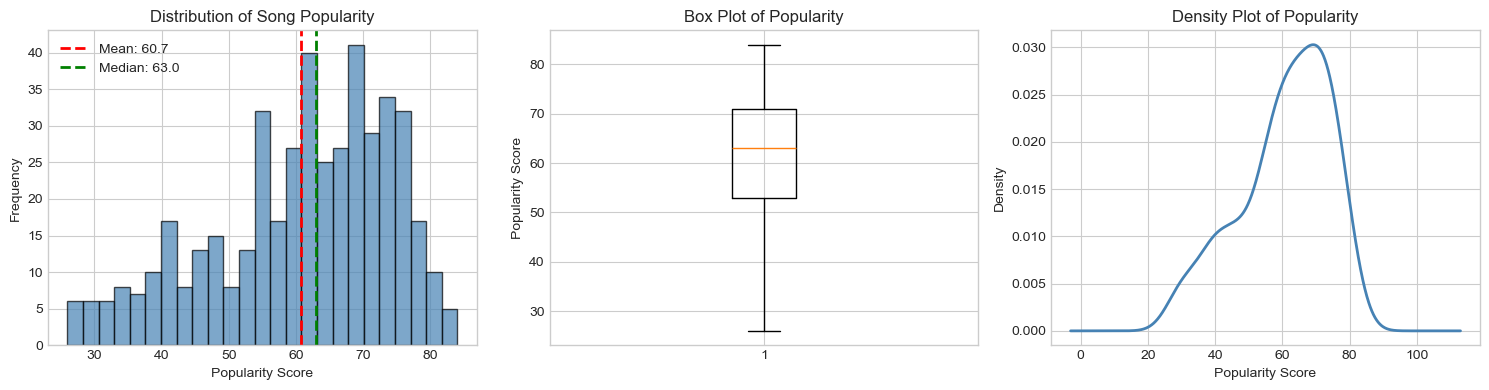

In [17]:
# Visualize target distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(train_df['pop'], bins=25, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(train_df['pop'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_df["pop"].mean():.1f}')
axes[0].axvline(train_df['pop'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {train_df["pop"].median():.1f}')
axes[0].set_xlabel('Popularity Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Song Popularity')
axes[0].legend()

# Box plot
axes[1].boxplot(train_df['pop'], vert=True)
axes[1].set_ylabel('Popularity Score')
axes[1].set_title('Box Plot of Popularity')

# KDE plot
train_df['pop'].plot(kind='kde', ax=axes[2], color='steelblue', linewidth=2)
axes[2].set_xlabel('Popularity Score')
axes[2].set_ylabel('Density')
axes[2].set_title('Density Plot of Popularity')

plt.tight_layout()
plt.show()

### 3.4 Feature Descriptions

Understanding what each feature represents helps with feature engineering and interpretation:

| Feature | Description | Typical Range |
|---------|-------------|---------------|
| **bpm** | Beats per minute (tempo) | 50-200+ |
| **nrgy** | Energy - intensity and activity | 0-100 |
| **dnce** | Danceability - suitability for dancing | 0-100 |
| **dB** | Loudness in decibels | -60 to 0 |
| **live** | Liveness - probability of live recording | 0-100 |
| **val** | Valence - musical positiveness/happiness | 0-100 |
| **dur** | Duration in seconds | Varies |
| **acous** | Acousticness - acoustic vs electronic | 0-100 |
| **spch** | Speechiness - presence of spoken words | 0-100 |

### 3.5 Correlation Analysis

Correlation analysis helps us:
- Identify features most related to popularity
- Detect multicollinearity (features correlated with each other)

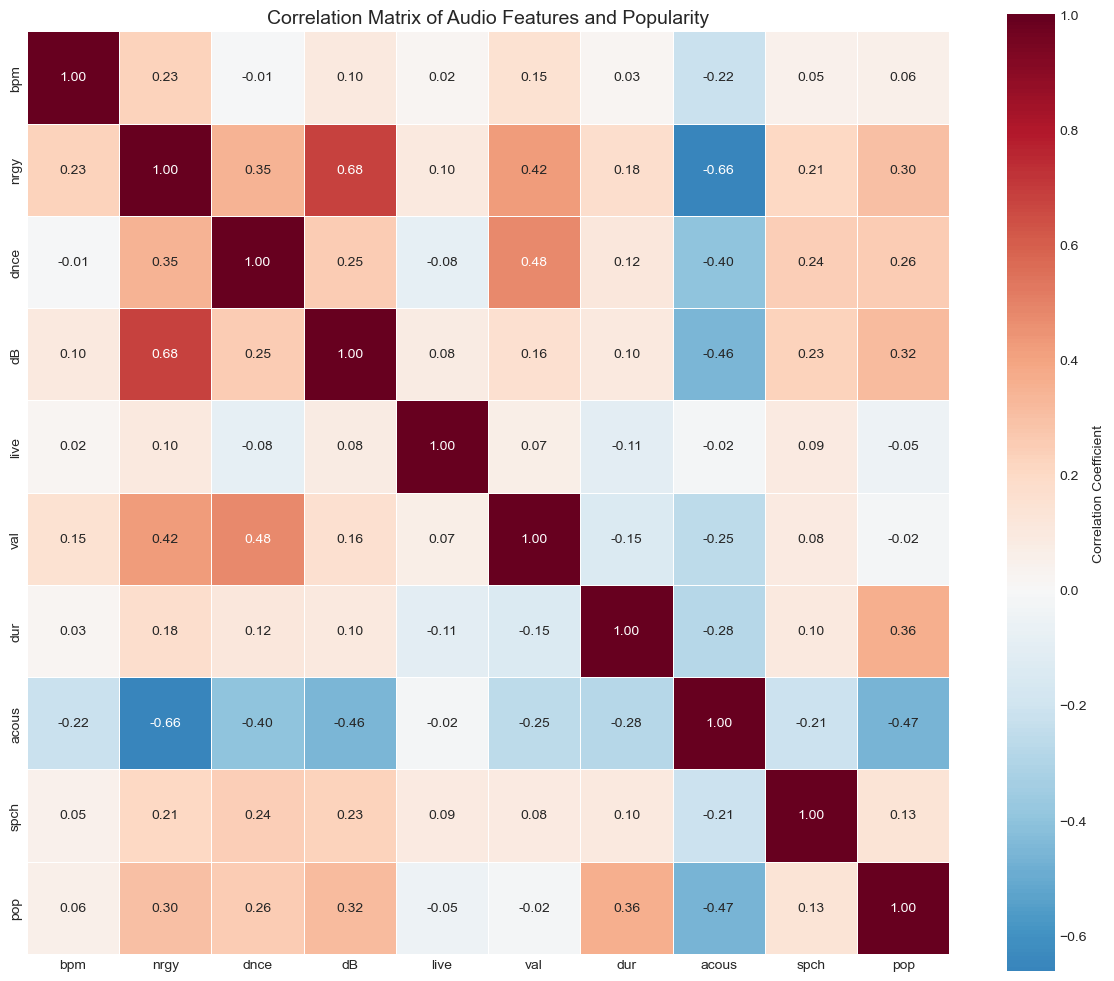

In [20]:
# Define numerical features
numerical_features = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']

# Correlation matrix
correlation_matrix = train_df[numerical_features + ['pop']].corr()

# Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', square=True, linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Audio Features and Popularity', fontsize=14)
plt.tight_layout()
plt.show()

FEATURE CORRELATIONS WITH POPULARITY
dur      0.3633
dB       0.3169
nrgy     0.3038
dnce     0.2587
spch     0.1310
bpm      0.0550
val     -0.0187
live    -0.0514
acous   -0.4659
Name: pop, dtype: float64


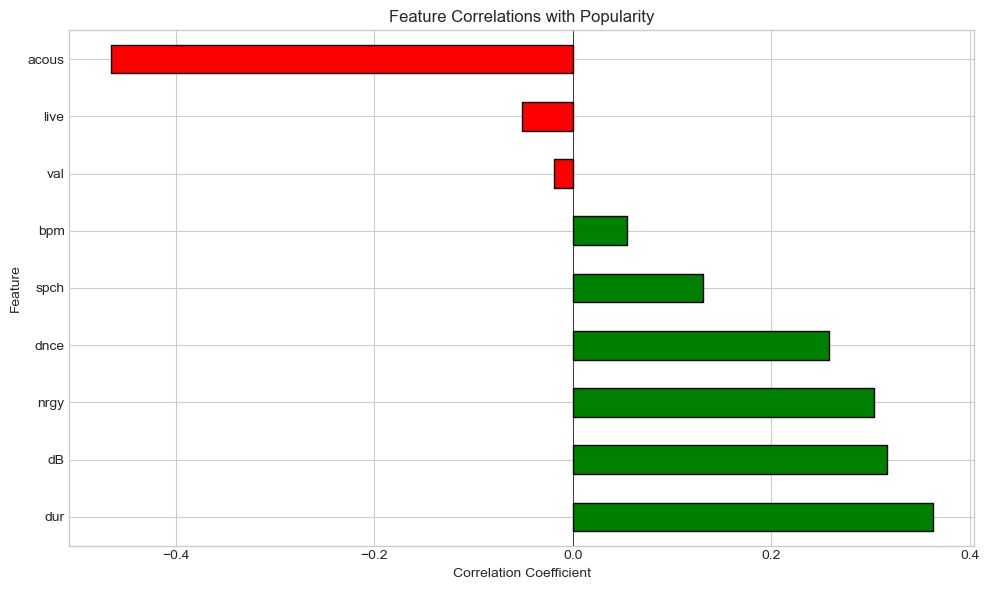

In [21]:
# Correlations with target variable
target_correlations = correlation_matrix['pop'].drop('pop').sort_values(ascending=False)

print("="*60)
print("FEATURE CORRELATIONS WITH POPULARITY")
print("="*60)
print(target_correlations.round(4))

# Visualize
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in target_correlations]
target_correlations.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.title('Feature Correlations with Popularity')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

### 3.6 Feature Distributions

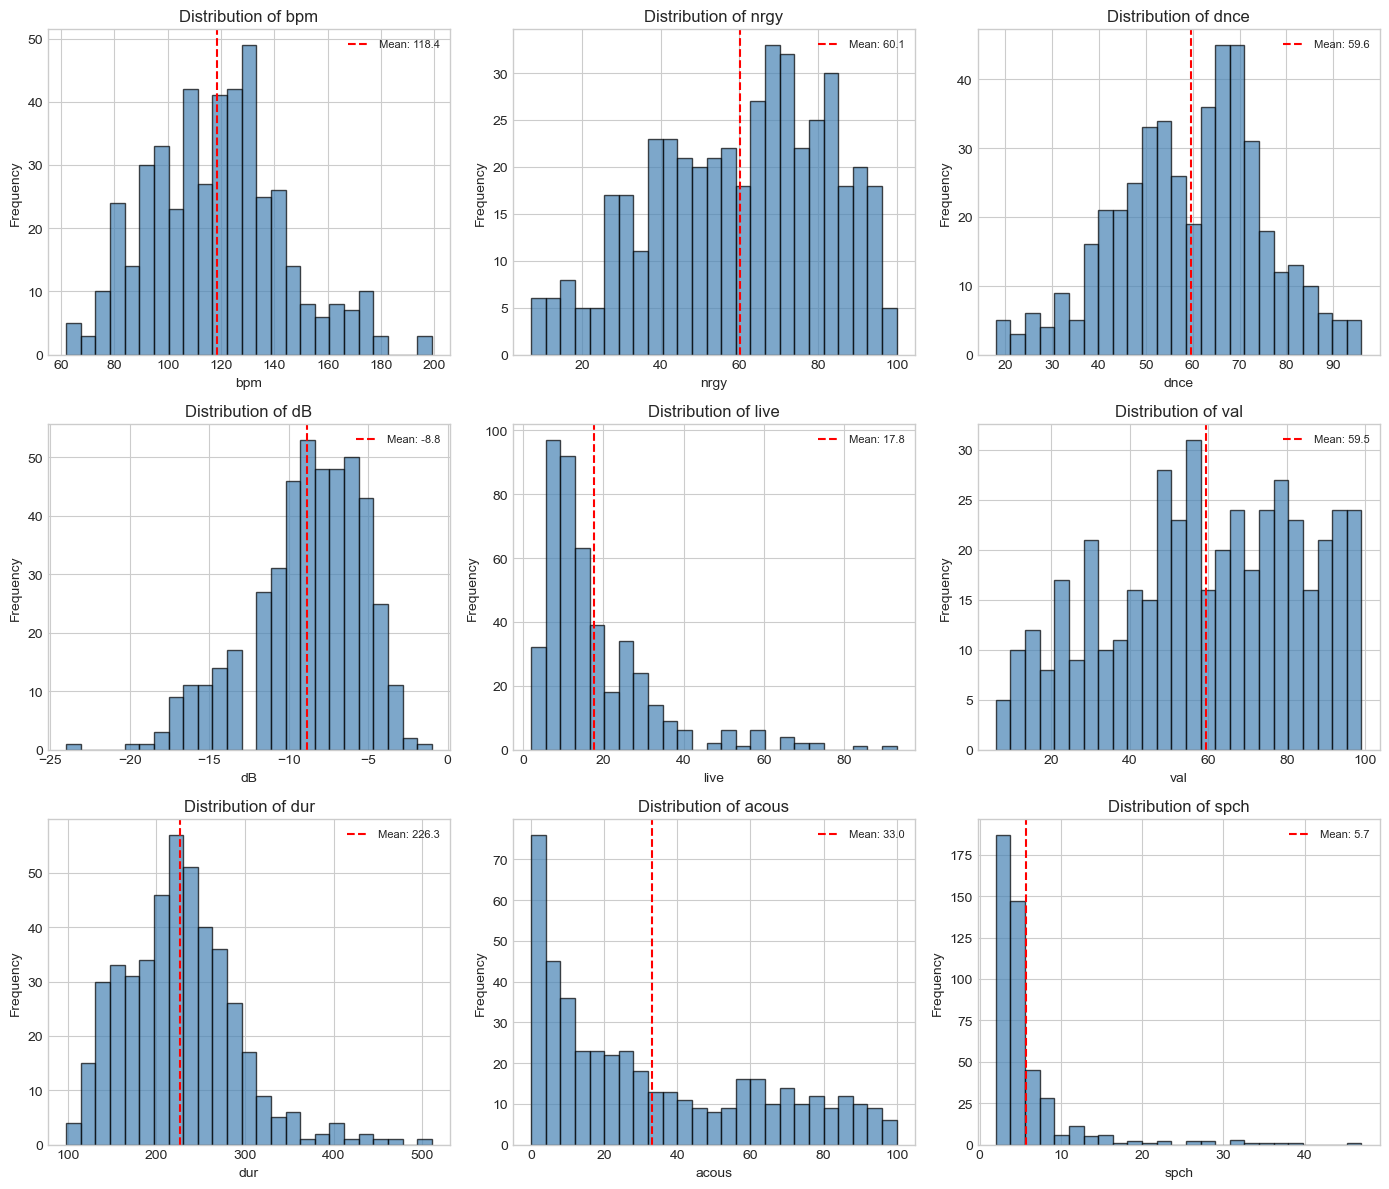

In [23]:
# Distribution of all numerical features
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(train_df[feature], bins=25, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].axvline(train_df[feature].mean(), color='red', linestyle='--', 
                      linewidth=1.5, label=f'Mean: {train_df[feature].mean():.1f}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

### 3.7 Scatter Plots: Features vs Popularity

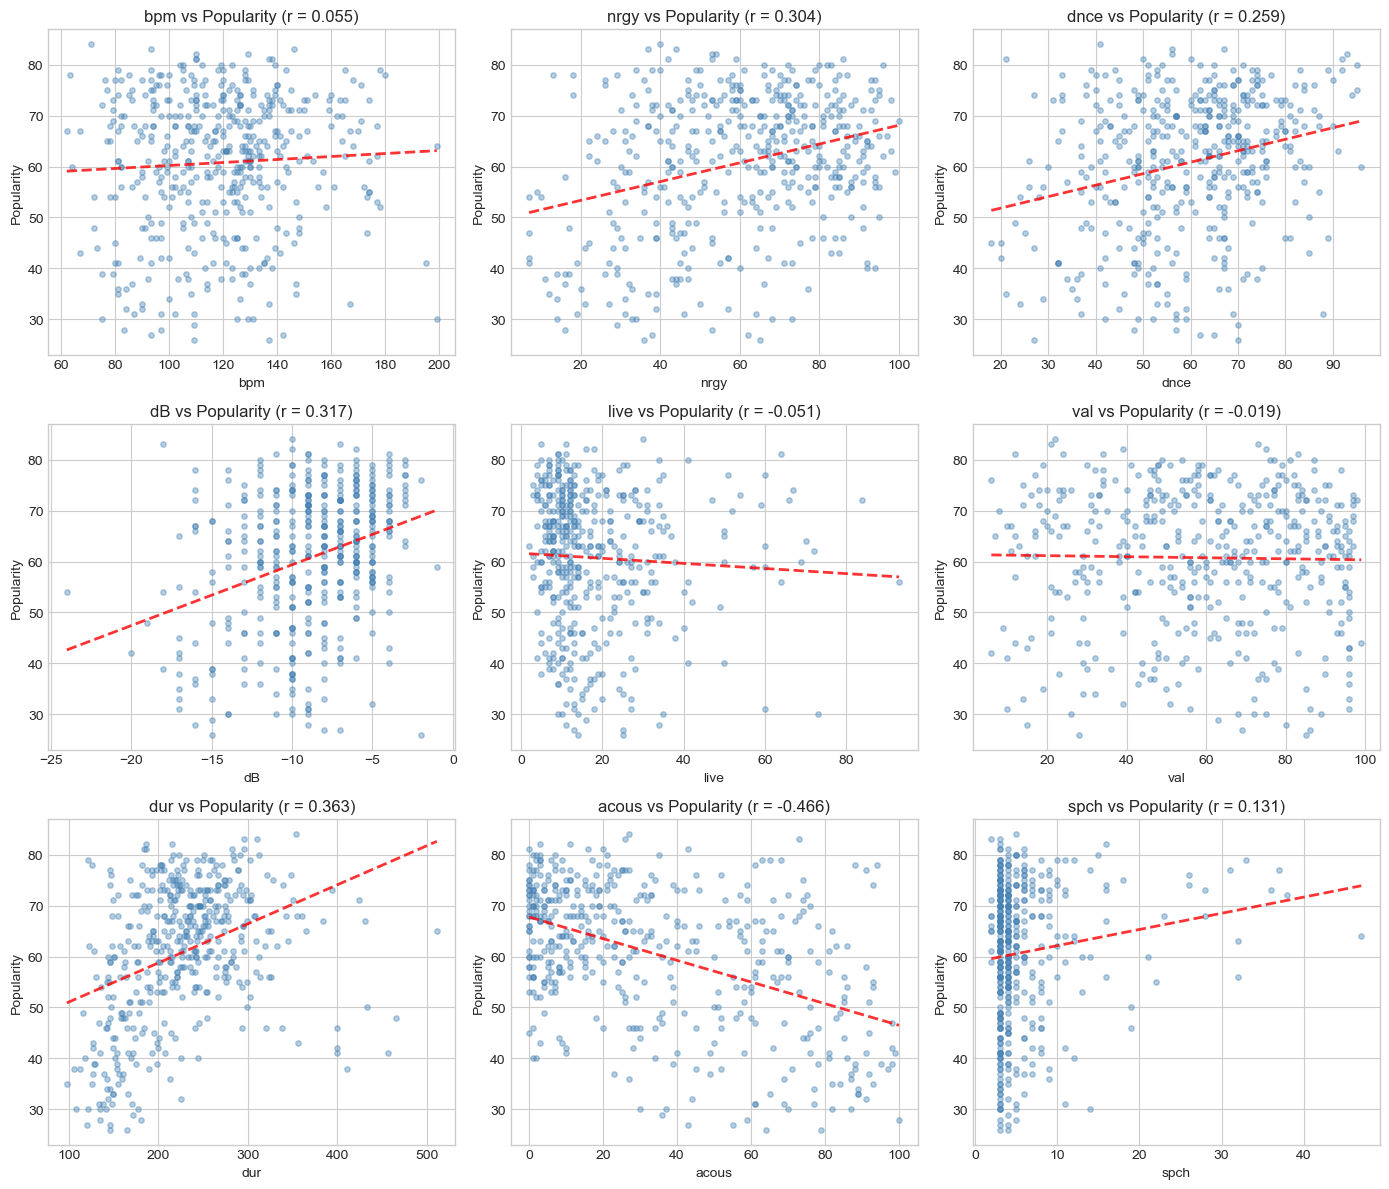

In [25]:
# Scatter plots of each feature vs popularity
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    axes[idx].scatter(train_df[feature], train_df['pop'], alpha=0.4, s=15, color='steelblue')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Popularity')
    
    # Add correlation to title
    corr = train_df[feature].corr(train_df['pop'])
    axes[idx].set_title(f'{feature} vs Popularity (r = {corr:.3f})')
    
    # Add trend line
    z = np.polyfit(train_df[feature], train_df['pop'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(train_df[feature].min(), train_df[feature].max(), 100)
    axes[idx].plot(x_line, p(x_line), 'r--', alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

### 3.8 Categorical Features Analysis

We have categorical features that might be useful:
- **top genre**: Genre classification
- **year**: Year of release (note: may be inconsistent due to re-releases)

In [27]:
# Genre analysis
print("="*60)
print("GENRE ANALYSIS")
print("="*60)

# Count genres (excluding empty)
genre_counts = train_df[train_df['top genre'] != '']['top genre'].value_counts()
print(f"Total unique genres: {len(genre_counts)}")
print(f"\nTop 15 most common genres:")
print(genre_counts.head(15))

GENRE ANALYSIS
Total unique genres: 86

Top 15 most common genres:
top genre
adult standards         68
album rock              66
dance pop               61
brill building pop      16
glam rock               16
europop                 14
dance rock              13
boy band                10
british invasion         8
bubblegum dance          7
disco                    7
art rock                 7
eurodance                6
barbadian pop            6
deep adult standards     6
Name: count, dtype: int64


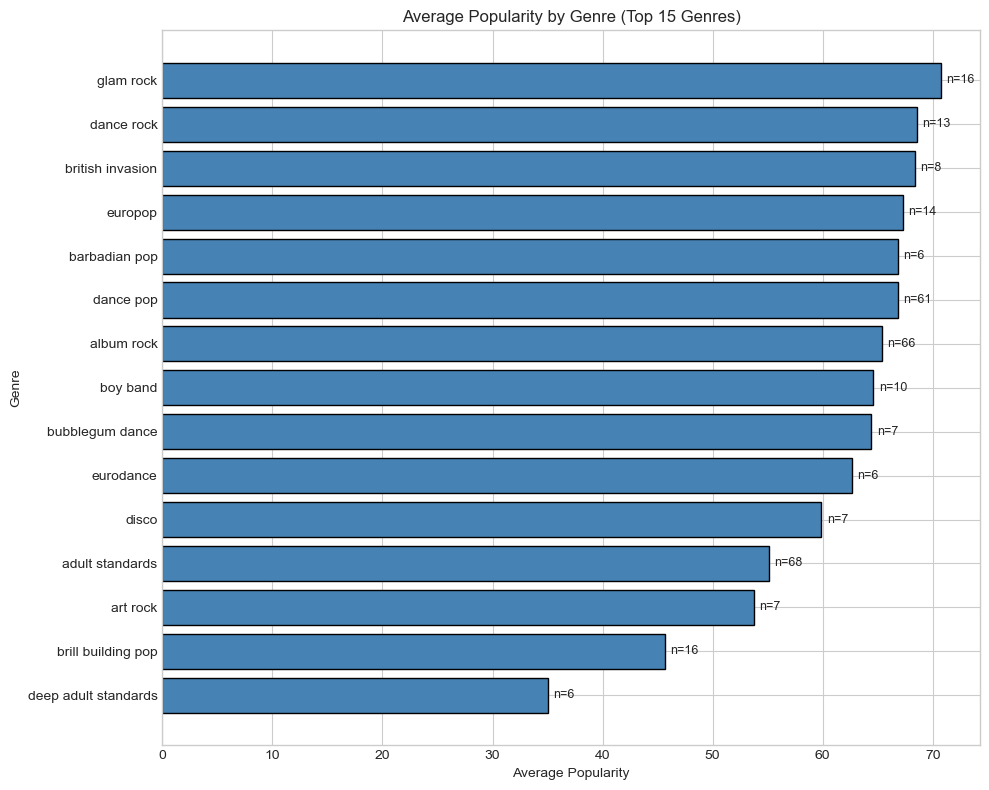

In [28]:
# Average popularity by genre (top 15 genres)
top_genres = genre_counts.head(15).index.tolist()
genre_pop = train_df[train_df['top genre'].isin(top_genres)].groupby('top genre')['pop'].agg(['mean', 'std', 'count'])
genre_pop = genre_pop.sort_values('mean', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(genre_pop.index, genre_pop['mean'], color='steelblue', edgecolor='black')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.title('Average Popularity by Genre (Top 15 Genres)')

# Add count annotations
for i, (genre, row) in enumerate(genre_pop.iterrows()):
    plt.text(row['mean'] + 0.5, i, f'n={int(row["count"])}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [29]:
# Year analysis
print("="*60)
print("YEAR ANALYSIS")
print("="*60)
print(f"Year range: {train_df['year'].min()} - {train_df['year'].max()}")
print(f"\nNote: Year may be inconsistent due to re-releases (per assignment notes)")

# Popularity by decade
train_df['decade'] = (train_df['year'] // 10) * 10
decade_pop = train_df.groupby('decade')['pop'].agg(['mean', 'std', 'count'])
print(f"\nPopularity by Decade:")
print(decade_pop)

YEAR ANALYSIS
Year range: 1948 - 2019

Note: Year may be inconsistent due to re-releases (per assignment notes)

Popularity by Decade:
             mean        std  count
decade                             
1940    62.000000        NaN      1
1950    40.833333   8.612007      6
1960    55.076923  13.080214     52
1970    64.376623  10.263680     77
1980    67.600000   9.798305     60
1990    61.151899   9.581083     79
2000    63.627273  13.721917    110
2010    51.514706  15.907843     68


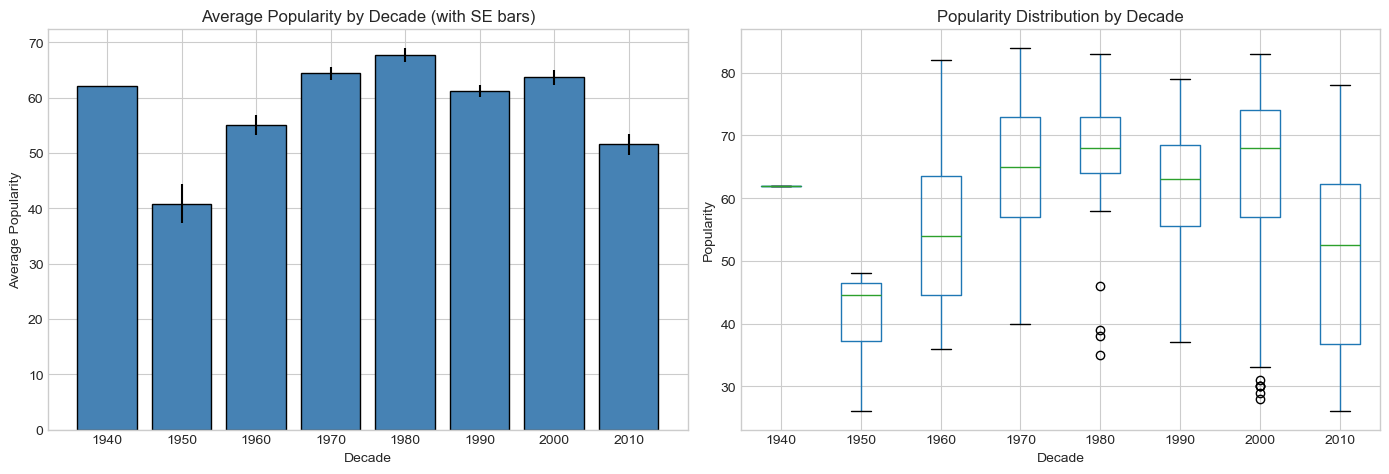

In [30]:
# Visualize popularity by decade
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(decade_pop.index.astype(str), decade_pop['mean'], 
            color='steelblue', edgecolor='black',
            yerr=decade_pop['std']/np.sqrt(decade_pop['count']))  # Standard error
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Average Popularity')
axes[0].set_title('Average Popularity by Decade (with SE bars)')

# Box plot
train_df.boxplot(column='pop', by='decade', ax=axes[1])
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Popularity')
axes[1].set_title('Popularity Distribution by Decade')
plt.suptitle('')

plt.tight_layout()
plt.show()

---
## 4. Data Cleaning and Preprocessing

Based on our EDA, we need to:
1. Handle missing values (especially empty 'top genre')
2. Decide which features to use
3. Encode categorical variables if using them
4. Scale features for certain algorithms

In [32]:
# Create copies for preprocessing
train_clean = train_df.copy()
test_clean = test_df.copy()

print("="*60)
print("DATA CLEANING")
print("="*60)

DATA CLEANING


In [33]:
# Handle missing 'top genre' values
# Replace empty strings with 'Unknown'
train_clean['top genre'] = train_clean['top genre'].replace('', 'Unknown')
test_clean['top genre'] = test_clean['top genre'].replace('', 'Unknown')

print(f"Replaced empty 'top genre' with 'Unknown'")
print(f"Training: {(train_clean['top genre'] == 'Unknown').sum()} 'Unknown' genres")
print(f"Test: {(test_clean['top genre'] == 'Unknown').sum()} 'Unknown' genres")

Replaced empty 'top genre' with 'Unknown'
Training: 0 'Unknown' genres
Test: 0 'Unknown' genres


In [34]:
# Check for any other missing values in numerical features
print(f"\nMissing values in numerical features:")
for col in numerical_features:
    train_miss = train_clean[col].isnull().sum()
    test_miss = test_clean[col].isnull().sum()
    if train_miss > 0 or test_miss > 0:
        print(f"  {col}: Train={train_miss}, Test={test_miss}")
        # Fill with median if missing
        median_val = train_clean[col].median()
        train_clean[col].fillna(median_val, inplace=True)
        test_clean[col].fillna(median_val, inplace=True)
        print(f"    -> Filled with median: {median_val}")

print("\nNo missing values remain in numerical features.")


Missing values in numerical features:

No missing values remain in numerical features.


In [35]:
# Define feature sets
# We'll start with numerical features only
feature_cols = numerical_features.copy()

print(f"\nFeatures to use: {feature_cols}")
print(f"Number of features: {len(feature_cols)}")


Features to use: ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']
Number of features: 9


In [36]:
# Prepare feature matrix and target
X = train_clean[feature_cols].copy()
y = train_clean['pop'].copy()

# Prepare test features
X_test_final = test_clean[feature_cols].copy()

print("="*60)
print("FEATURE MATRICES CREATED")
print("="*60)
print(f"Training X shape: {X.shape}")
print(f"Training y shape: {y.shape}")
print(f"Test X shape:     {X_test_final.shape}")

FEATURE MATRICES CREATED
Training X shape: (453, 9)
Training y shape: (453,)
Test X shape:     (114, 9)


In [37]:
# Split training data for validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("="*60)
print("TRAIN-VALIDATION SPLIT")
print("="*60)
print(f"Training samples:   {len(X_train)} ({100*len(X_train)/len(X):.1f}%)")
print(f"Validation samples: {len(X_val)} ({100*len(X_val)/len(X):.1f}%)")
print(f"\nTarget distribution check:")
print(f"  Train mean: {y_train.mean():.2f}, std: {y_train.std():.2f}")
print(f"  Val mean:   {y_val.mean():.2f}, std: {y_val.std():.2f}")

TRAIN-VALIDATION SPLIT
Training samples:   362 (79.9%)
Validation samples: 91 (20.1%)

Target distribution check:
  Train mean: 61.24, std: 13.02
  Val mean:   58.76, std: 15.04


In [38]:
# Feature scaling
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# Also fit on full training set for final model
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X)
X_test_final_scaled = scaler_full.transform(X_test_final)

print("Features scaled using StandardScaler")

Features scaled using StandardScaler


---
## 5. Model Building and Comparison

We'll train multiple regression models and compare their performance using RMSE.

### Models to evaluate:
1. **Linear Regression** - Simple baseline
2. **Ridge Regression** - Linear with L2 regularization
3. **Lasso Regression** - Linear with L1 regularization
4. **Decision Tree** - Non-linear, interpretable
5. **Random Forest** - Ensemble of trees
6. **Gradient Boosting** - Sequential ensemble

In [40]:
# Helper function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Dictionary to store results
results = {}

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

print(f"Models to evaluate: {list(models.keys())}")

Models to evaluate: ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']


In [41]:
# Train and evaluate each model
print("="*70)
print("MODEL TRAINING AND EVALUATION")
print("="*70)

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Use scaled data for linear models, unscaled for tree-based
    if any(keyword in name for keyword in ['Linear', 'Ridge', 'Lasso']):
        X_tr, X_va = X_train_scaled, X_val_scaled
        X_full = X_full_scaled
    else:
        X_tr, X_va = X_train.values, X_val.values
        X_full = X.values
    
    # Train
    model.fit(X_tr, y_train)
    
    # Predict
    train_pred = model.predict(X_tr)
    val_pred = model.predict(X_va)
    
    # Calculate metrics
    train_rmse = calculate_rmse(y_train, train_pred)
    val_rmse = calculate_rmse(y_val, val_pred)
    train_r2 = r2_score(y_train, train_pred)
    val_r2 = r2_score(y_val, val_pred)
    
    # Cross-validation on full training set
    cv_scores = cross_val_score(model, X_full, y, cv=5, scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results[name] = {
        'Train RMSE': train_rmse,
        'Val RMSE': val_rmse,
        'CV RMSE (mean)': cv_rmse,
        'CV RMSE (std)': cv_std,
        'Train R²': train_r2,
        'Val R²': val_r2
    }
    
    print(f"  Train RMSE: {train_rmse:.4f}  |  Val RMSE: {val_rmse:.4f}")
    print(f"  CV RMSE:    {cv_rmse:.4f} (+/- {cv_std:.4f})")
    print(f"  Train R²:   {train_r2:.4f}  |  Val R²:  {val_r2:.4f}")

MODEL TRAINING AND EVALUATION

--- Linear Regression ---
  Train RMSE: 10.9184  |  Val RMSE: 12.1317
  CV RMSE:    11.4423 (+/- 1.0948)
  Train R²:   0.2950  |  Val R²:  0.3420

--- Ridge Regression ---
  Train RMSE: 10.9184  |  Val RMSE: 12.1306
  CV RMSE:    11.4399 (+/- 1.0957)
  Train R²:   0.2950  |  Val R²:  0.3421

--- Lasso Regression ---
  Train RMSE: 10.9252  |  Val RMSE: 12.1022
  CV RMSE:    11.4221 (+/- 1.1121)
  Train R²:   0.2941  |  Val R²:  0.3452

--- Decision Tree ---
  Train RMSE: 5.1013  |  Val RMSE: 15.2231
  CV RMSE:    15.5446 (+/- 0.7304)
  Train R²:   0.8461  |  Val R²:  -0.0361

--- Random Forest ---
  Train RMSE: 5.0056  |  Val RMSE: 11.6492
  CV RMSE:    11.2692 (+/- 0.8789)
  Train R²:   0.8518  |  Val R²:  0.3933

--- Gradient Boosting ---
  Train RMSE: 2.6249  |  Val RMSE: 12.2167
  CV RMSE:    11.8443 (+/- 0.8976)
  Train R²:   0.9593  |  Val R²:  0.3328


In [42]:
# Results summary
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(results_df)

MODEL COMPARISON SUMMARY
                   Train RMSE  Val RMSE  CV RMSE (mean)  CV RMSE (std)  \
Linear Regression     10.9184   12.1317         11.4423         1.0948   
Ridge Regression      10.9184   12.1306         11.4399         1.0957   
Lasso Regression      10.9252   12.1022         11.4221         1.1121   
Decision Tree          5.1013   15.2231         15.5446         0.7304   
Random Forest          5.0056   11.6492         11.2692         0.8789   
Gradient Boosting      2.6249   12.2167         11.8443         0.8976   

                   Train R²  Val R²  
Linear Regression    0.2950  0.3420  
Ridge Regression     0.2950  0.3421  
Lasso Regression     0.2941  0.3452  
Decision Tree        0.8461 -0.0361  
Random Forest        0.8518  0.3933  
Gradient Boosting    0.9593  0.3328  


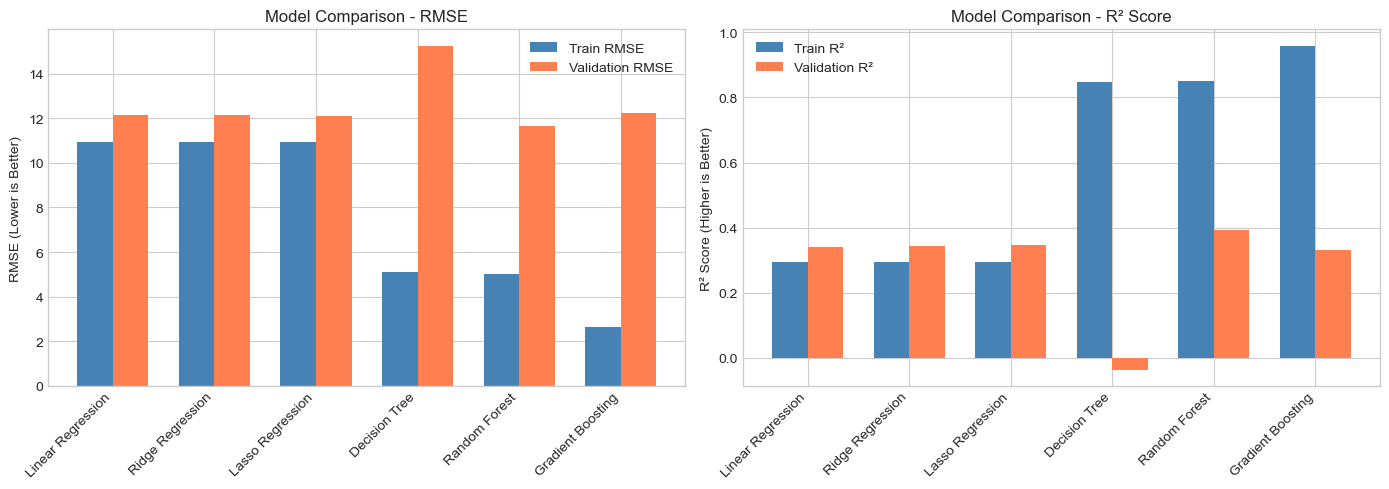

In [43]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE comparison
x = np.arange(len(results_df))
width = 0.35

axes[0].bar(x - width/2, results_df['Train RMSE'], width, label='Train RMSE', color='steelblue')
axes[0].bar(x + width/2, results_df['Val RMSE'], width, label='Validation RMSE', color='coral')
axes[0].set_ylabel('RMSE (Lower is Better)')
axes[0].set_title('Model Comparison - RMSE')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[0].legend()

# R² comparison
axes[1].bar(x - width/2, results_df['Train R²'], width, label='Train R²', color='steelblue')
axes[1].bar(x + width/2, results_df['Val R²'], width, label='Validation R²', color='coral')
axes[1].set_ylabel('R² Score (Higher is Better)')
axes[1].set_title('Model Comparison - R² Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

---
## 6. Best Model Analysis

In [45]:
# Identify best model based on CV RMSE
best_model_name = results_df['CV RMSE (mean)'].idxmin()
best_model = models[best_model_name]

print("="*60)
print(f"BEST MODEL: {best_model_name}")
print("="*60)
print(f"CV RMSE:    {results_df.loc[best_model_name, 'CV RMSE (mean)']:.4f}")
print(f"Val RMSE:   {results_df.loc[best_model_name, 'Val RMSE']:.4f}")
print(f"Val R²:     {results_df.loc[best_model_name, 'Val R²']:.4f}")

BEST MODEL: Random Forest
CV RMSE:    11.2692
Val RMSE:   11.6492
Val R²:     0.3933


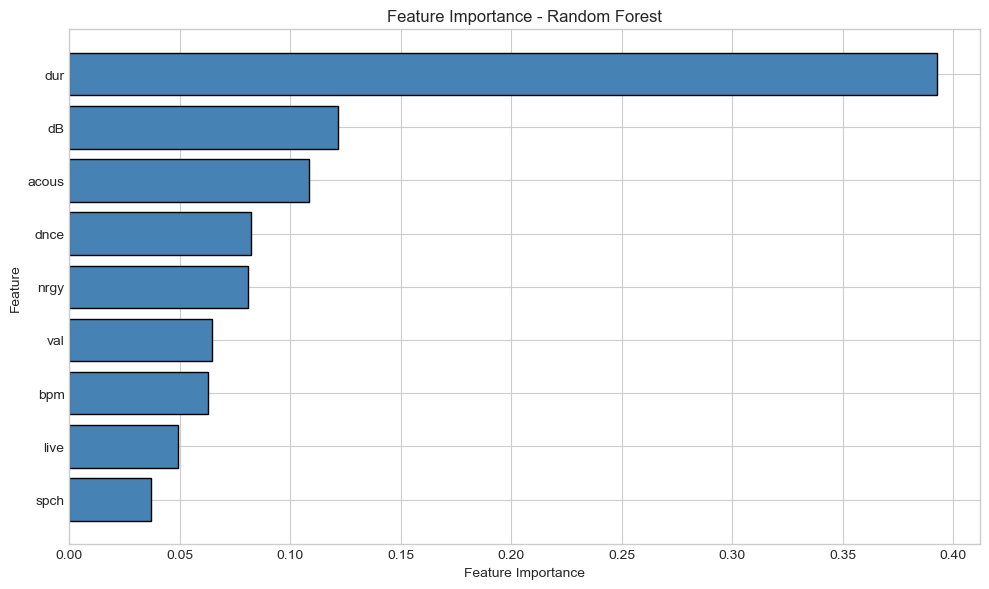


Feature Importance Ranking:
Feature  Importance
    dur    0.392618
     dB    0.121749
  acous    0.108661
   dnce    0.082172
   nrgy    0.081058
    val    0.064643
    bpm    0.062932
   live    0.049170
   spch    0.036997


In [46]:
# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
             color='steelblue', edgecolor='black')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    print("\nFeature Importance Ranking:")
    print(feature_importance.sort_values('Importance', ascending=False).to_string(index=False))

# For linear models, show coefficients
elif hasattr(best_model, 'coef_'):
    coef_df = pd.DataFrame({
        'Feature': feature_cols,
        'Coefficient': best_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=True)
    
    plt.figure(figsize=(10, 6))
    colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
    plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='black')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Feature Coefficients - {best_model_name}')
    plt.axvline(x=0, color='black', linewidth=0.5)
    plt.tight_layout()
    plt.show()

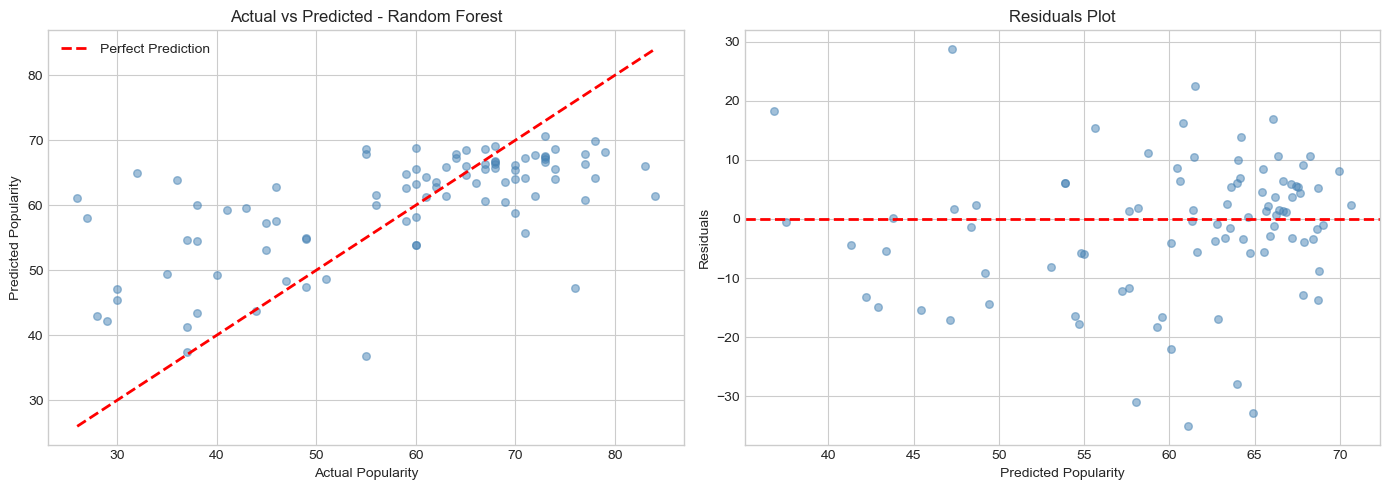


Residuals Statistics:
  Mean: -1.5067
  Std:  11.6154


In [47]:
# Prediction vs Actual plots (using validation set)
if any(keyword in best_model_name for keyword in ['Linear', 'Ridge', 'Lasso']):
    y_pred_val = best_model.predict(X_val_scaled)
else:
    y_pred_val = best_model.predict(X_val.values)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted
axes[0].scatter(y_val, y_pred_val, alpha=0.5, s=30, color='steelblue')
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Popularity')
axes[0].set_ylabel('Predicted Popularity')
axes[0].set_title(f'Actual vs Predicted - {best_model_name}')
axes[0].legend()

# Residuals
residuals = y_val - y_pred_val
axes[1].scatter(y_pred_val, residuals, alpha=0.5, s=30, color='steelblue')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Popularity')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()

print(f"\nResiduals Statistics:")
print(f"  Mean: {residuals.mean():.4f}")
print(f"  Std:  {residuals.std():.4f}")

---
## 7. Hyperparameter Tuning (Optional)

Let's try to improve our best model with hyperparameter tuning.

In [49]:
# Hyperparameter tuning for Random Forest
print("="*60)
print("HYPERPARAMETER TUNING - Random Forest")
print("="*60)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    rf, param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Running grid search...")
grid_search.fit(X.values, y)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {-grid_search.best_score_:.4f}")

# Save best model
best_rf = grid_search.best_estimator_

HYPERPARAMETER TUNING - Random Forest
Running grid search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best CV RMSE: 11.0337


---
## 8. Generate Predictions for Test Set

Now we'll train our best model on the full training data and generate predictions for the test set.

In [51]:
# Train final model on full training data
print("="*60)
print("FINAL MODEL TRAINING")
print("="*60)

# Use the tuned Random Forest if available, otherwise use the best model
if 'best_rf' in dir():
    final_model = best_rf
    print(f"Using tuned Random Forest")
else:
    final_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    final_model.fit(X.values, y)
    print(f"Using default Random Forest")

# Make predictions on test set
test_predictions = final_model.predict(X_test_final.values)

print(f"\nGenerated {len(test_predictions)} predictions for test set")
print(f"\nPrediction statistics:")
print(f"  Mean: {test_predictions.mean():.2f}")
print(f"  Std:  {test_predictions.std():.2f}")
print(f"  Min:  {test_predictions.min():.2f}")
print(f"  Max:  {test_predictions.max():.2f}")

FINAL MODEL TRAINING
Using tuned Random Forest

Generated 114 predictions for test set

Prediction statistics:
  Mean: 61.18
  Std:  7.56
  Min:  41.20
  Max:  69.88


In [52]:
# Create submission file
submission = pd.DataFrame({
    'Id': test_clean['Id'],
    'pop': test_predictions
})

# Save to CSV
submission.to_csv('./submission.csv', index=False)

print("="*60)
print("SUBMISSION FILE CREATED")
print("="*60)
print(f"File saved: ./submission.csv")
print(f"\nFirst 10 predictions:")
print(submission.head(10))

SUBMISSION FILE CREATED
File saved: ./submission.csv

First 10 predictions:
    Id        pop
0  454  67.329275
1  455  66.435805
2  456  55.903081
3  457  64.421834
4  458  49.957649
5  459  66.438069
6  460  60.131665
7  461  42.756673
8  462  67.107658
9  463  65.392402


---
## 9. Results Interpretation and Discussion

### 9.1 Understanding Model Performance

**RMSE of ~11.27 - How to Interpret This?**

To put this in context:
- Popularity ranges from 26 to 84 (a span of ~58 points)
- Standard deviation of popularity is ~13.47
- Our RMSE of 11.27 is **less than 1 standard deviation** - this is reasonable performance

However, the **R² of ~0.39** tells us that only **39% of the variation in popularity is explained by our audio features**. This means **61% of what makes a song popular is NOT captured by these features**.

**Why is popularity hard to predict with audio features alone?**

Popularity is influenced by many factors not in our dataset:
- **Artist fame/following** - A new song by a famous artist will be more popular
- **Marketing budget** - Promoted songs get more streams
- **Release timing** - Seasonal trends, competing releases
- **Viral moments** - TikTok trends, memes, movie soundtracks
- **Playlist placement** - Being on popular Spotify playlists
- **Cultural/social factors** - Current events, social movements

### 9.2 Feature Insights - What Makes Songs Popular?

Based on our correlation analysis and feature importance:

| Feature | Correlation | Importance | Interpretation |
|---------|-------------|------------|----------------|
| **dur** (duration) | +0.36 | 39.3% | Longer songs tend to be more popular. This could reflect that popular songs get more complete listens, or that album-oriented artists produce longer tracks. |
| **dB** (loudness) | +0.32 | 12.2% | Louder songs are more popular. This aligns with the "loudness war" in music production where mastering engineers compress and boost levels for impact. |
| **nrgy** (energy) | +0.30 | 8.1% | High-energy songs are more engaging and memorable, leading to more plays. |
| **dnce** (danceability) | +0.26 | 8.2% | More danceable songs are popular - this makes sense for party/club music and viral TikTok trends. |
| **acous** (acousticness) | **-0.47** | 10.9% | **Strongest correlation!** Acoustic songs are LESS popular. Modern popular music tends to be electronic/produced. |

### 9.3 Model Comparison Insights

**Why did Random Forest win?**
- It's an **ensemble method** that combines many decision trees
- Reduces overfitting compared to a single Decision Tree
- Handles non-linear relationships between features and popularity well
- Robust to outliers and noise in the data

**Signs of Overfitting in Other Models:**
- **Decision Tree**: Train RMSE ~5.1 vs Val RMSE ~15.2 = severe overfitting (memorized training data)
- **Gradient Boosting**: Train RMSE ~2.6 vs Val RMSE ~12.2 = also overfitting (too powerful without proper tuning)

**Linear Models (Linear, Ridge, Lasso):**
- Similar performance (~11.4 RMSE)
- No overfitting (train ≈ validation error)
- But limited by assuming linear relationships

### 9.4 Limitations of This Analysis

1. **Small Dataset**: Only 453 training samples limits model complexity and generalization
2. **Missing Information**: We don't have artist popularity, release date trends, playlist features, etc.
3. **Year Inconsistencies**: As noted in the assignment, re-releases affect year data reliability
4. **Genre Not Fully Utilized**: We only used numerical features; genre encoding could help
5. **Audio Features Limited**: Spotify's audio features are derived metrics, not raw audio analysis

### 9.5 Recommendations for Improvement

For future work, consider:
- **Add genre encoding**: One-hot encode top genres as additional features
- **Feature engineering**: Create interaction terms (e.g., energy × danceability)
- **Try advanced models**: XGBoost, LightGBM with careful hyperparameter tuning
- **Ensemble approaches**: Combine predictions from multiple models
- **External data**: If available, incorporate artist follower counts or playlist data

---
## 10. Conclusion

### Summary of Results

| Metric | Value |
|--------|-------|
| Best Model | Random Forest |
| CV RMSE | ~11.27 |
| Validation R² | ~0.39 |
| Training Samples | 453 |
| Test Predictions | 114 |

### Key Takeaways

1. **Audio features have limited predictive power** for song popularity (R² ≈ 0.39), suggesting that external factors (artist fame, marketing, viral trends) play a larger role.

2. **Duration and acousticness** are the most influential features - longer, less acoustic (more produced) songs tend to be more popular.

3. **Ensemble methods** (Random Forest) outperformed both simple linear models and single decision trees by balancing complexity and generalization.

4. **Overfitting is a concern** with small datasets - Decision Tree and Gradient Boosting showed signs of memorizing training data.

### Files Generated

- `submission.csv` - Predictions for test set (ready for Kaggle submission)